In [1]:
#Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import requests
import gmaps
import os
import json
import time

#Import API Key
from api_keys import g_key

In [2]:
#the set the path
csv_path = "../Resources/country_vaccinations_clean.csv"

# Read our COVID data into pandas
covid_df = pd.read_csv(csv_path)
covid_df

country iso_code       date  total_vaccinations  people_vaccinated  \
0     Albania      ALB  1/10/2021                   0                  0   
1     Albania      ALB  1/11/2021                   0                  0   
2     Albania      ALB  1/12/2021                 128                128   
3     Albania      ALB  1/13/2021                 188                188   
4     Albania      ALB  1/14/2021                 266                266   
...       ...      ...        ...                 ...                ...   
2911    Wales        0   2/6/2021              592228             589622   
2912    Wales        0   2/7/2021              606768             603976   
2913    Wales        0   2/8/2021              632251             628760   
2914    Wales        0   2/9/2021              659106             655419   
2915    Wales        0  2/10/2021              687892             684097   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                           0                       0                   0   
1                           0                       0                  64   
2                           0                       0                  64   
3                           0                      60                  63   
4                           0                      78                  66   
...                       ...                     ...                 ...   
2911                     2606                   32760               26854   
2912                     2792                   14540               27089   
2913                     3491                   25483               27364   
2914                     3687                   26855               27921   
2915                     3795                   28786               28015   

      total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   
...                              ...                            ...   
2911                              18                             18   
2912                              19                             19   
2913                              20                             19   
2914                              20                             20   
2915                              21                             21   

      people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                       0                               0   
1                                       0                              22   
2                                       0                              22   
3                                       0                              22   
4                                       0                              23   
...                                   ...                             ...   
2911                                    0                            8517   
2912                                    0                            8592   
2913                                    0                            8679   
2914                                    0                            8856   
2915                                    0                            8886   

                                 vaccines                       source_name  
0                         Pfizer/BioNTech                Ministry of Health  
1                         Pfizer/BioNTech                Ministry of Health  
2                         Pfizer/BioNTech                Ministry of Health  
3                         Pfizer/BioNTech                Ministry of Health  


## Store Cleaned Data in DataFrame   

In [3]:
#Q1:  Total number of people fully vaccinated by country and ratios-daily  
#DF:  Country, Code, Date, People Fully Vaccinated, People Fully Vac/Hundred, add vaccine and source name
#Dict: Total number of people fully vaccinated - this is the number of people that received the entire set of immunization 
#according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
#Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
#Show covid_count() as part of understanding the data structure.  Show count and describe.
#Graph Type:  Bar Chart

#Check the number of countries 
country_count=covid_df["country"].value_counts()
country_count


England             60
United Kingdom      60
Scotland            60
Wales               60
Northern Ireland    60
                    ..
Iran                 2
Algeria              2
Liechtenstein        1
Saint Helena         1
Greenland            1
Name: country, Length: 85, dtype: int64

In [4]:
#List the sum of "people_fully_vaccinated" grouped by country
country_sum=covid_df.groupby(["country"]).sum()["people_fully_vaccinated"]
country_sum

country
Albania                       439
Algeria                         0
Andorra                         0
Argentina                 1912283
Austria                    703280
                          ...    
Turkey                          0
United Arab Emirates       250000
United Kingdom           15206782
United States           140464500
Wales                       32642
Name: people_fully_vaccinated, Length: 85, dtype: int64

In [36]:
#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries=covid_df[["country","people_fully_vaccinated"]].copy()
filtered_countries=filtered_countries[filtered_countries["people_fully_vaccinated"] !=0]

filtered_no_zero=filtered_countries.groupby(["country"]).sum()["people_fully_vaccinated"]
filtered_no_zero_df=pd.DataFrame(filtered_no_zero)
filtered_no_zero_df
fil_no_zero_df_sort=filtered_no_zero_df.sort_values("people_fully_vaccinated")
fil_no_zero_df_sort

people_fully_vaccinated
country                                      
Albania                                   439
Guernsey                                  522
Faeroe Islands                           2513
Bermuda                                  3191
Jersey                                   9360
Singapore                               12100
Cayman Islands                          13141
Cyprus                                  17632
Seychelles                              22606
Iceland                                 24651
Isle of Man                             27413
Wales                                   32642
Luxembourg                              34235
Costa Rica                              42809
Gibraltar                               46617
Malta                                  102949
Oman                                   107229
Serbia                                 130927
Croatia                                143749
Latvia                                 185588
Estonia                                189933
Canada                                 203044
Scotland                               207587
Brazil                                 212358
United Arab Emirates                   250000
Bulgaria                               282895
Ireland                                317940
Chile                                  380920
Sweden                                 406860
Slovakia                               410131
Norway                                 514713
Finland                                518408
Slovenia                               608036
Lithuania                              623519
Austria                                703280
Northern Ireland                       736826
Greece                                 935311
Portugal                               982941
Mexico                                1106693
Belgium                               1148671
Czechia                               1291958
Hungary                               1398292
Russia                                1700000
Indonesia                             1730334
Denmark                               1752613
Argentina                             1912283
France                                2501865
Romania                               2838109
Poland                                4982853
Spain                                 6977466
Germany                              13277221
England                              14222807
Italy                                14759760
United Kingdom                       15206782
Israel                               41431117
United States                       140464500

Text(0, 0.5, 'No. of People Fully Vaccinated')

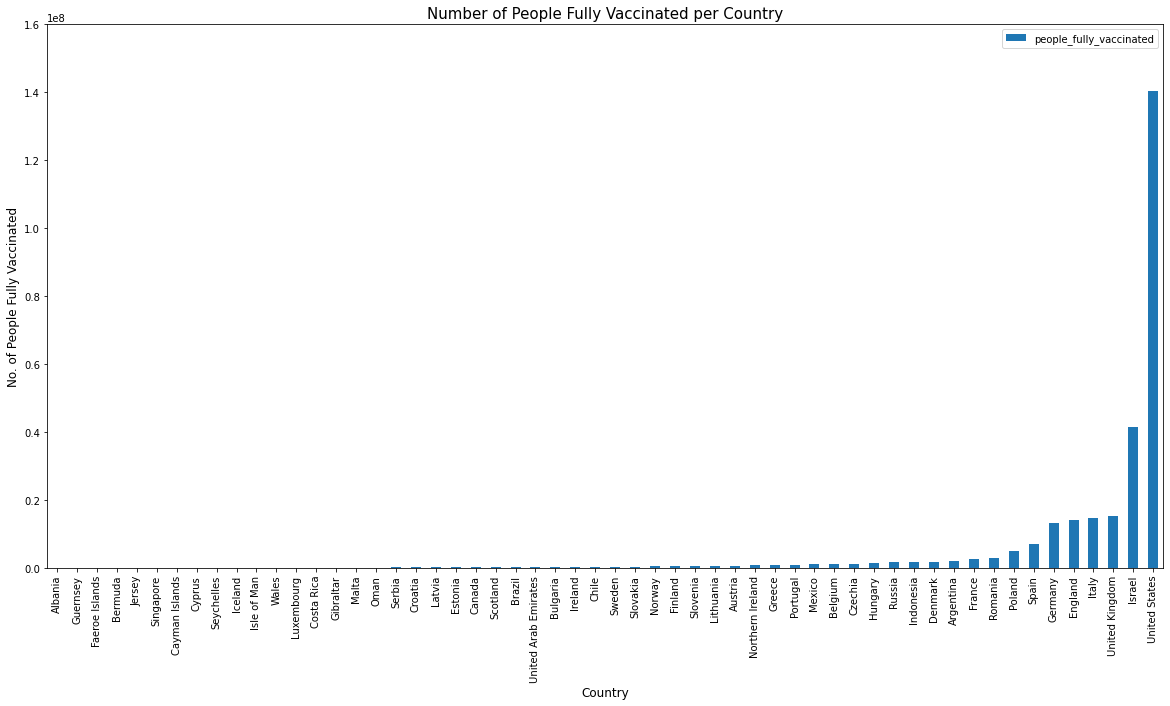

In [76]:
#Plot filtered DataFrame (sorted) into bar graph of people fully vaccinated (sum) grouped by country
fil_no_zero_df_sort.plot.bar(figsize=(20,10))
plt.title("Number of People Fully Vaccinated per Country", fontsize=15)
plt.ylim(0,160000000)
plt.xlabel("Country", fontsize=12)
plt.ylabel("No. of People Fully Vaccinated", fontsize=12)

In [87]:
#Create new DF that only contains country and people_fully_vaccinated_per_hundred columns and removes 0 from people_fully_vaccinated_per_hundred
filtered_countries_hun=covid_df[["country","people_fully_vaccinated_per_hundred"]].copy()
filtered_countries_hun=filtered_countries_hun[filtered_countries_hun["people_fully_vaccinated_per_hundred"] !=0]

filtered_no_zero_hun=filtered_countries_hun.groupby(["country"])["people_fully_vaccinated_per_hundred"].max()
filtered_no_zero__hun_df=pd.DataFrame(filtered_no_zero_hun)
filtered_no_zero__hun_df

fil_no_zero_df_sort_hun=filtered_no_zero__hun_df.sort_values("people_fully_vaccinated_per_hundred")
fil_no_zero_df_sort_hun

people_fully_vaccinated_per_hundred
country                                                  
Austria                                                 1
Romania                                                 1
Portugal                                                1
Poland                                                  1
Norway                                                  1
Northern Ireland                                        1
Lithuania                                               1
Slovakia                                                1
Ireland                                                 1
Iceland                                                 1
Russia                                                  1
Greece                                                  1
Hungary                                                 1
Germany                                                 1
Belgium                                                 1
Sweden                                                  1
Croatia                                                 1
Cyprus                                                  1
Czechia                                                 1
Estonia                                                 1
Finland                                                 1
Serbia                                                  1
Italy                                                   2
Denmark                                                 2
Spain                                                   2
Malta                                                   2
Slovenia                                                2
Faeroe Islands                                          2
Bermuda                                                 2
United Arab Emirates                                    2
United States                                           3
Jersey                                                  3
Isle of Man                                             3
Cayman Islands                                          7
Seychelles                                             10
Gibraltar                                              20
Israel                                                 27

Text(0, 0.5, 'No. of People Fully Vaccinated per Hundred')

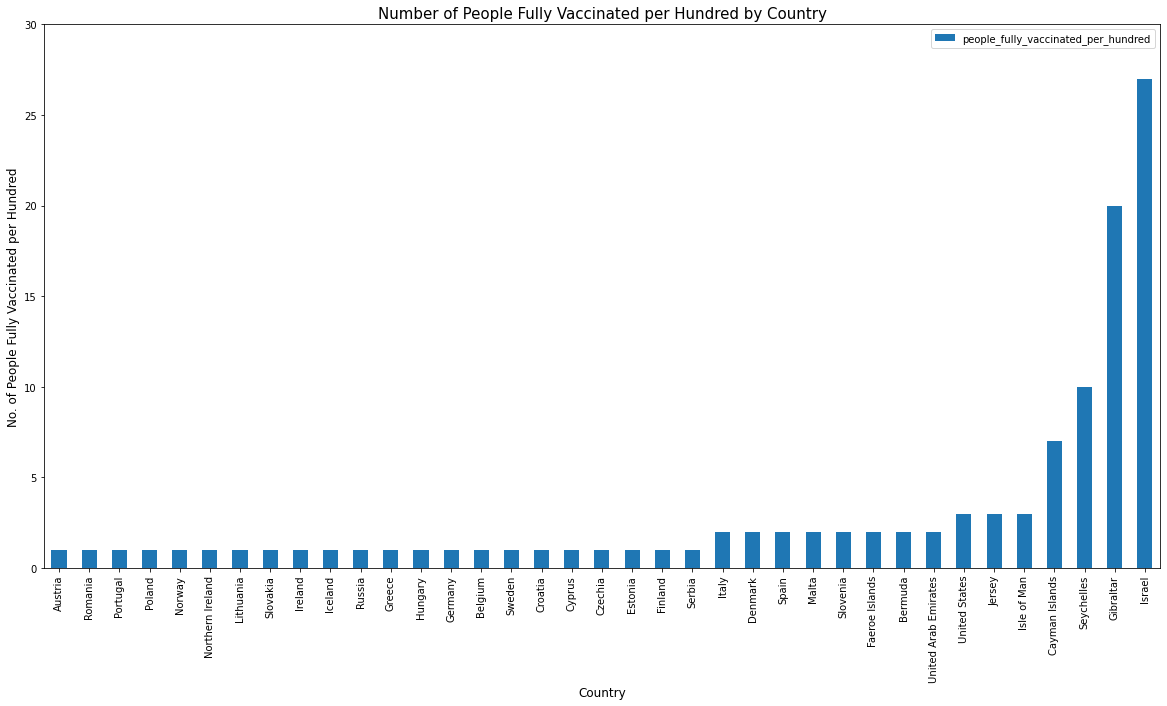

In [88]:
#Plot filtered DataFrame (sorted) into bar graph of people fully vaccinated per hundred (sum) grouped by country
fil_no_zero_df_sort_hun.plot.bar(figsize=(20,10))
plt.title("Number of People Fully Vaccinated per Hundred by Country", fontsize=15)
plt.ylim(0,30)
plt.xlabel("Country", fontsize=12)
plt.ylabel("No. of People Fully Vaccinated per Hundred", fontsize=12)

In [105]:
#Q2: Which vaccines and mixes are being distributed most /least. 
#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries_vac=covid_df[["country","people_fully_vaccinated","vaccines"]].copy()
filtered_countries_vac=filtered_countries_vac[filtered_countries_vac["people_fully_vaccinated"] !=0]

filtered_no_zero_vac=filtered_countries_vac.groupby(["country"]).sum()["people_fully_vaccinated"]
filtered_no_zero_vac

#filtered_countries_vac["country"].unique()
#filtered_countries_vac
#filtered_no_zero=filtered_countries_vac.groupby(["country"])["vaccines"].unique()
#filtered_no_zero
#vaccines_lst=filtered_countries_vac["vaccines"].unique()
#vaccines_lst

country
Albania                       439
Argentina                 1912283
Austria                    703280
Belgium                   1148671
Bermuda                      3191
Brazil                     212358
Bulgaria                   282895
Canada                     203044
Cayman Islands              13141
Chile                      380920
Costa Rica                  42809
Croatia                    143749
Cyprus                      17632
Czechia                   1291958
Denmark                   1752613
England                  14222807
Estonia                    189933
Faeroe Islands               2513
Finland                    518408
France                    2501865
Germany                  13277221
Gibraltar                   46617
Greece                     935311
Guernsey                      522
Hungary                   1398292
Iceland                     24651
Indonesia                 1730334
Ireland                    317940
Isle of Man                 27413
Israel

In [10]:
#Graph the results

In [11]:
#Q3:  Northern vs Southern Hemisphere-Identify global patterns or observations in regards to the vaccination types.
#DF
#Create Heat Map